<br></br>
<div style="text-align: center; font-size: 3em; color: darkblue"><strong>Glassdoor Reviews</strong></div>
<br></br>

<div style="background-color:#ffe5e0; padding:15px; border-left:6px solid #e67e22; border-radius:4px;">
  <h2 style="margin-top:0; color:#e67e22;">Problem</h2>
  <hr style="border: 1px solid #e67e22; margin-top:5px; margin-bottom:15px;">

<ol>
    <li>What is the distribution of overall ratings?</li>
    <li>What is the average rating across all companies?</li>
    <li>Which companies have the highest and lowest average ratings?</li>
    <li>What are the average scores for:</li>
    <ul>
        <li>Work-life balance</li>
        <li>Culture and values</li>
        <li>Career opportunities</li>
        <li>Compensation and benefits</li>
        <li>Senior management</li>
    </ul>
    <li>Which job titles have the highest and lowest average ratings?</li>
    <li>How do the top 5 most-reviewed companies compare in each of the sub-ratings?</li>
    <li>Which company has the highest positive recommendation percentage?</li>
    <li>Is there a correlation between overall rating and recommend?</li>
    <li>What is the proportion of current and former employees in the dataset?</li>
</ol>
</div>

<div style="background-color:#eafaf1; padding:15px; border-left:6px solid #27ae60; border-radius:4px;">
  <h2 style="margin-top:0; color:#27ae60;">Part 3: Analyzing the Data</h2>
</div>

In [1]:
# Set the working directory
import os
os.chdir('..')

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data
df = pd.read_csv('data/processed/processed_glassdoor.csv')

In [4]:
# View the data
df.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-12-11,office administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
1,AFH-Wealth-Management,2016-01-28,office administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
2,AFH-Wealth-Management,2016-04-23,office administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
3,AFH-Wealth-Management,2016-05-26,office administrator,"Current Employee, less than 1 year",NaN,3,4.0,2.0,2.0,3.0,2.0,o,r,r,Office administrator,Some good people to work with.\n\nFlexible wor...,Morale.\n\nLack of managerial structure.\n\nDo...
4,AFH-Wealth-Management,2016-09-23,ifa,Former Employee,"Bromsgrove, England, England",1,1.0,1.0,1.0,1.0,1.0,x,o,r,It horrible management,Good investment management strategy. Overall t...,The management and seniors are ruthless. No tr...


<div style="background-color:#eaf4fa; padding:15px; border-left:6px solid #3498db; border-radius:4px;">
  <h3 style="margin-top:0; color:#3498db;">1: What is the distribution of overall ratings?</h3>
</div>

In [5]:
df['overall_rating'].describe()

count    577992.000000
mean          3.645268
std           1.195981
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: overall_rating, dtype: float64

In [6]:
df['overall_rating'].value_counts().sort_index()

overall_rating
1     44049
2     52558
3    130284
4    188586
5    162515
Name: count, dtype: int64

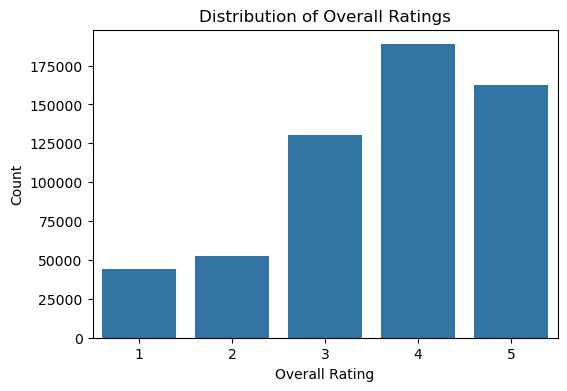

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='overall_rating', data=df)
plt.title("Distribution of Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.savefig('assets/Distribution of Overall Ratings.png', transparent = True, bbox_inches='tight')
plt.show();

The bar chart shows the frequency of overall ratings. The most common overall rating is 4, with a count of 188,586. Rating 5 is the second most frequent, with over 160,000 instances. 

<div style="background-color:#eaf4fa; padding:15px; border-left:6px solid #3498db; border-radius:4px;">
  <h3 style="margin-top:0; color:#3498db;">2: What is the average rating across all companies?</h3>
</div>

In [8]:
average_rating = df['overall_rating'].mean()
average_rating

3.6452684466220986

In [9]:
average_rating_by_firm = df.groupby('firm')['overall_rating'].mean()
average_rating_by_firm

firm
AFH-Wealth-Management    2.865385
AJ-Bell                  3.268041
ALDI                     3.361619
AQA                      3.634146
ASDA                     3.263749
                           ...   
i-Net-Solution           3.666667
ibis                     3.325581
mydentist-UK             3.373494
next                     3.341141
the-LEGO-Group           4.006202
Name: overall_rating, Length: 428, dtype: float64

In [10]:
average_rating_by_firm_sorted = average_rating_by_firm.sort_values(ascending=False)
average_rating_by_firm_sorted

firm
The-Survey-Association          5.000000
Time-Etc                        4.794118
Northern-Gas-and-Power          4.760085
CarShop-UK                      4.675214
Michelmores                     4.672131
                                  ...   
Macdonald-Hotels-and-Resorts    2.366492
Creative-Support                2.308571
James-Hay-Partnership           2.276316
Diligenta                       2.226562
The-Range                       2.109510
Name: overall_rating, Length: 428, dtype: float64

<Axes: ylabel='Density'>

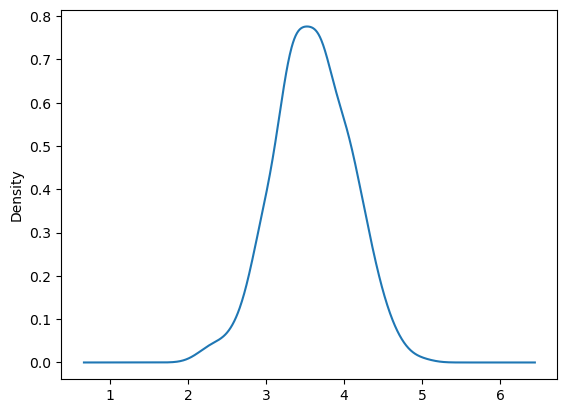

In [11]:
average_rating_by_firm.plot(kind='kde')

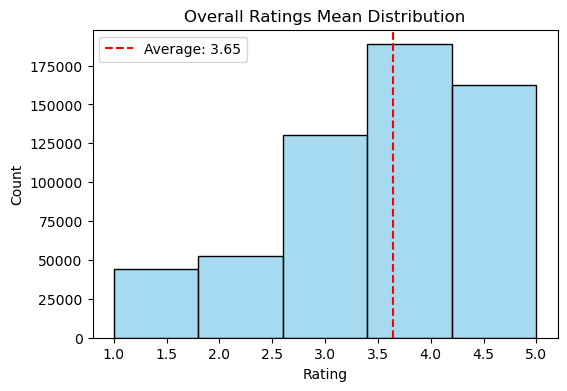

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['overall_rating'], bins=5, kde=False, color='skyblue')
plt.axvline(average_rating, color='red', linestyle='--', label=f"Average: {average_rating:.2f}")
plt.title("Overall Ratings Mean Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend()
plt.savefig('assets/histogram for average overall rating.png', transparent = True, bbox_inches='tight')
plt.show();

The histogram shows the frequency of the average of overall ratings given to companies and it reveals that the most common overall rating falls within the 3.0 to 4.0 range. A dashed red line is included to mark the average rating, which is 3.65.

<div style="background-color:#eaf4fa; padding:15px; border-left:6px solid #3498db; border-radius:4px;">
  <h3 style="margin-top:0; color:#3498db;">3: Which companies have the highest and lowest average ratings?</h3>
</div>

In [13]:
highest_avg_company = average_rating_by_firm.idxmax()
highest_avg_rating = average_rating_by_firm.max()

lowest_avg_company = average_rating_by_firm.idxmin()
lowest_avg_rating = average_rating_by_firm.min()

print(highest_avg_company, highest_avg_rating)
print(lowest_avg_company, lowest_avg_rating)

The-Survey-Association 5.0
The-Range 2.1095100864553316


In [14]:
top_companies = average_rating_by_firm.sort_values(ascending=False).head(10)
bottom_companies = average_rating_by_firm.sort_values(ascending=False).tail(10)

print("Top 5 Companies with Highest Overall Rating:")
print(top_companies)

print("\nBottom 5 Companies with Lowest Overall Rating:")
print(bottom_companies)

Top 5 Companies with Highest Overall Rating:
firm
The-Survey-Association    5.000000
Time-Etc                  4.794118
Northern-Gas-and-Power    4.760085
CarShop-UK                4.675214
Michelmores               4.672131
Sport-England             4.611111
Bain-and-Company          4.608263
National-Star             4.562500
Gateley                   4.531915
Taylor-Wimpey             4.524096
Name: overall_rating, dtype: float64

Bottom 5 Companies with Lowest Overall Rating:
firm
WLT-Group                       2.583933
HM-Prison-Service               2.573333
Grange-Hotels                   2.500000
Curtis-Banks                    2.468085
Link-Group                      2.366492
Macdonald-Hotels-and-Resorts    2.366492
Creative-Support                2.308571
James-Hay-Partnership           2.276316
Diligenta                       2.226562
The-Range                       2.109510
Name: overall_rating, dtype: float64


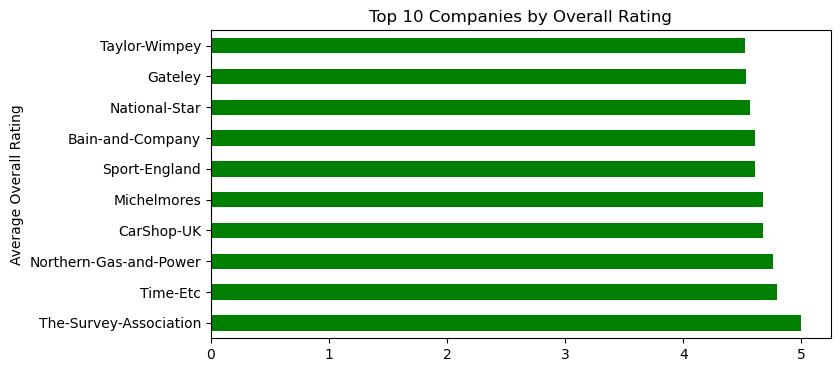

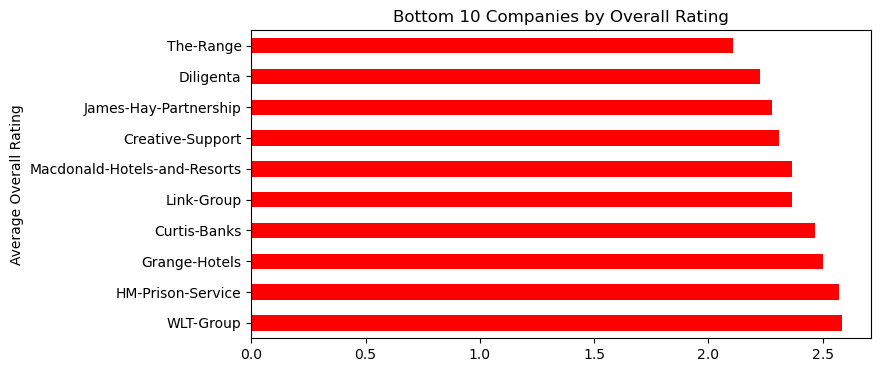

In [15]:
plt.figure(figsize=(8,4))
top_companies.plot(kind='barh', color='green')
plt.title("Top 10 Companies by Overall Rating")
plt.ylabel("Average Overall Rating")
plt.savefig('assets/Top 10 companies.png', transparent = True, bbox_inches='tight')
plt.show();

plt.figure(figsize=(8,4))
bottom_companies.plot(kind='barh', color='red')
plt.title("Bottom 10 Companies by Overall Rating")
plt.ylabel("Average Overall Rating")
plt.savefig('assets/Bottom 10 companies.png', transparent = True, bbox_inches='tight')
plt.show();

The first bar chart illustrates the top 10 companies that have received the highest overall rating that is greater than 4.5, and the second bar chart presents the bottom 10 companies that have received the lowest overall rating, that is less than 2.5.

<div style="background-color:#eaf4fa; padding:15px; border-left:6px solid #3498db; border-radius:4px;">
  <h3 style="margin-top:0; color:#3498db;">4: What are the average scores for each sub-rating?</h3>
</div>

In [16]:
sub_ratings = ['work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt']
avg_sub_ratings = df[sub_ratings].mean().sort_values(ascending=False)
print("\nAverage sub-ratings:\n", avg_sub_ratings)


Average sub-ratings:
 culture_values       3.598365
career_opp           3.491126
comp_benefits        3.418933
work_life_balance    3.382275
senior_mgmt          3.192996
dtype: float64


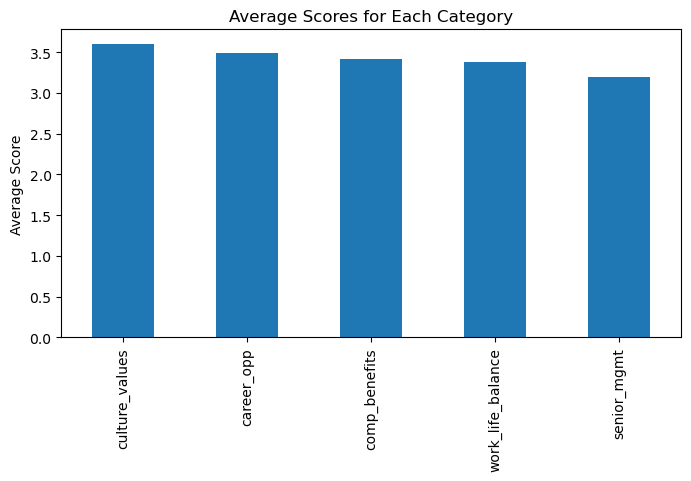

In [17]:
plt.figure(figsize=(8,4))
avg_sub_ratings.plot(kind='bar')
plt.title("Average Scores for Each Category")
plt.ylabel("Average Score")
plt.savefig('assets/Average score for subrating.png', transparent = True, bbox_inches='tight')
plt.show();

The bar chart illustrates the average values of each sub-rating category. Culture and values rating has the highest average score, at approximately 3.6. Senior management rating has the lowest average score, at approximately 3.2.

In [18]:
# Work-life balance Average Rating by Firm
avg_work_life_balance = df.groupby('firm')['work_life_balance'].mean()
avg_work_life_balance

firm
AFH-Wealth-Management    3.461538
AJ-Bell                  3.484536
ALDI                     2.570496
AQA                      3.743902
ASDA                     3.102602
                           ...   
i-Net-Solution           3.666667
ibis                     2.965116
mydentist-UK             3.289157
next                     3.253407
the-LEGO-Group           4.003101
Name: work_life_balance, Length: 428, dtype: float64

In [19]:
# Culture and Values Average Rating by Firm
avg_culture_values = df.groupby('firm')['culture_values'].mean()
avg_culture_values

firm
AFH-Wealth-Management    2.923077
AJ-Bell                  3.453608
ALDI                     3.124021
AQA                      3.475610
ASDA                     3.185689
                           ...   
i-Net-Solution           3.666667
ibis                     3.267442
mydentist-UK             3.180723
next                     3.150767
the-LEGO-Group           4.277519
Name: culture_values, Length: 428, dtype: float64

In [20]:
# Career Opportunities Average Rating by Firm
avg_career_opp = df.groupby('firm')['career_opp'].mean()
avg_career_opp

firm
AFH-Wealth-Management    2.865385
AJ-Bell                  3.247423
ALDI                     3.211488
AQA                      2.780488
ASDA                     2.907747
                           ...   
i-Net-Solution           3.000000
ibis                     3.151163
mydentist-UK             3.216867
next                     2.854770
the-LEGO-Group           3.272868
Name: career_opp, Length: 428, dtype: float64

In [21]:
# Compensation and benefits Average Rating by Firm
avg_comp_benefits = df.groupby('firm')['comp_benefits'].mean()
avg_comp_benefits

firm
AFH-Wealth-Management    2.750000
AJ-Bell                  3.030928
ALDI                     3.417755
AQA                      3.243902
ASDA                     3.047014
                           ...   
i-Net-Solution           3.000000
ibis                     2.953488
mydentist-UK             2.843373
next                     3.062606
the-LEGO-Group           3.697674
Name: comp_benefits, Length: 428, dtype: float64

In [22]:
# Senior management Average Rating by Firm
avg_senior_mgmt = df.groupby('firm')['senior_mgmt'].mean()
avg_senior_mgmt

firm
AFH-Wealth-Management    2.750000
AJ-Bell                  3.072165
ALDI                     2.994778
AQA                      2.926829
ASDA                     2.743938
                           ...   
i-Net-Solution           3.333333
ibis                     2.860465
mydentist-UK             3.048193
next                     2.968484
the-LEGO-Group           3.472868
Name: senior_mgmt, Length: 428, dtype: float64

<div style="background-color:#eaf4fa; padding:15px; border-left:6px solid #3498db; border-radius:4px;">
  <h3 style="margin-top:0; color:#3498db;">5: Which job titles have the highest and lowest average ratings?</h3>
</div>

In [23]:
average_rating_by_job = df.groupby(['job_title','firm'])['overall_rating'].mean()
average_rating_by_job

job_title                              firm        
a crew members                         McDonald-s      5.0
a grade e                              Virgin-Media    1.0
a group position                       BT              2.0
a job for teenagers not a career path  McDonald-s      3.0
a little bit of everything             McDonald-s      4.0
                                                      ... 
zoo keeper                             Tesco           5.0
zos developer                          IBM             4.0
zos storage support                    IBM             5.0
zs associate                           Unilever        4.0
zsystems software engineer             IBM             1.0
Name: overall_rating, Length: 109994, dtype: float64

In [24]:
average_rating_by_job_sorted = average_rating_by_job.sort_values(ascending=False)
average_rating_by_job_sorted

job_title                         firm            
abuse analyst                     Google              5.0
youtube process                   Google              5.0
a crew members                    McDonald-s          5.0
zos storage support               IBM                 5.0
youtube partnerships              Google              5.0
                                                     ... 
corporate trainer                 Capita              1.0
                                  DHL-Supply-Chain    1.0
cost control                      Vodafone            1.0
senior territory sales executive  Diageo              1.0
costumer service                  Deloitte            1.0
Name: overall_rating, Length: 109994, dtype: float64

In [25]:
max_job_index = average_rating_by_job.idxmax()
max_job_rating = average_rating_by_job.max()

min_job_index = average_rating_by_job.idxmin()
min_job_rating = average_rating_by_job.min()

print(max_job_index, max_job_rating)
print(min_job_index, min_job_rating)

('a crew members', 'McDonald-s') 5.0
('a grade e', 'Virgin-Media') 1.0


In [26]:
top_jobs = average_rating_by_job.sort_values(ascending=False).head(10)
bottom_jobs = average_rating_by_job.sort_values(ascending=False).tail(10)

print("Top 10 Jobs with Highest Overall Rating:")
print(top_jobs)

print("\nBottom 10 Jobs with Lowest Overall Rating:")
print(bottom_jobs)

Top 10 Jobs with Highest Overall Rating:
job_title             firm                 
abuse analyst         Google                   5.0
youtube process       Google                   5.0
a crew members        McDonald-s               5.0
zos storage support   IBM                      5.0
youtube partnerships  Google                   5.0
zoo keeper            Tesco                    5.0
operation manager     Sodexo                   5.0
                      Unilever                 5.0
                      Compass-Group            5.0
operarions manager    Barchester-Healthcare    5.0
Name: overall_rating, dtype: float64

Bottom 10 Jobs with Lowest Overall Rating:
job_title                                   firm            
operational support centre support officer  Serco-Group         1.0
worldwide ai transformation manager         IBM                 1.0
senior technical architect                  Oracle              1.0
court staff                                 HMCTS          

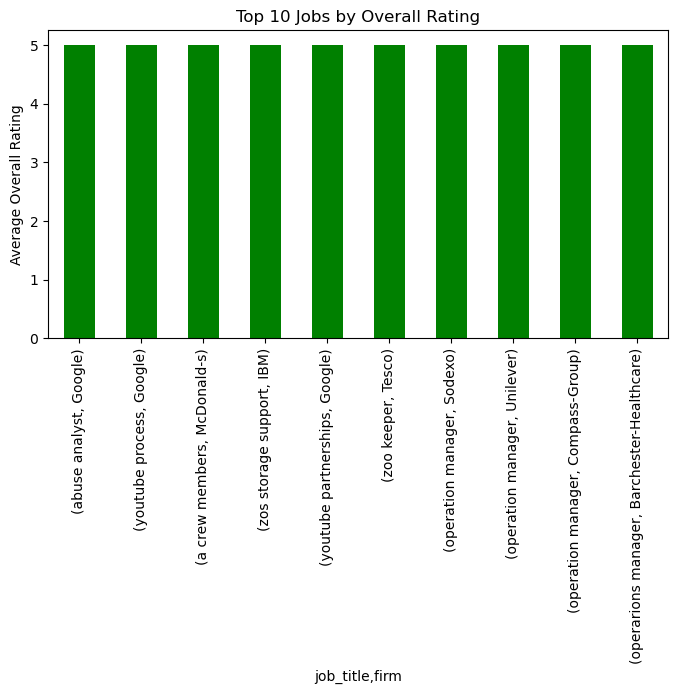

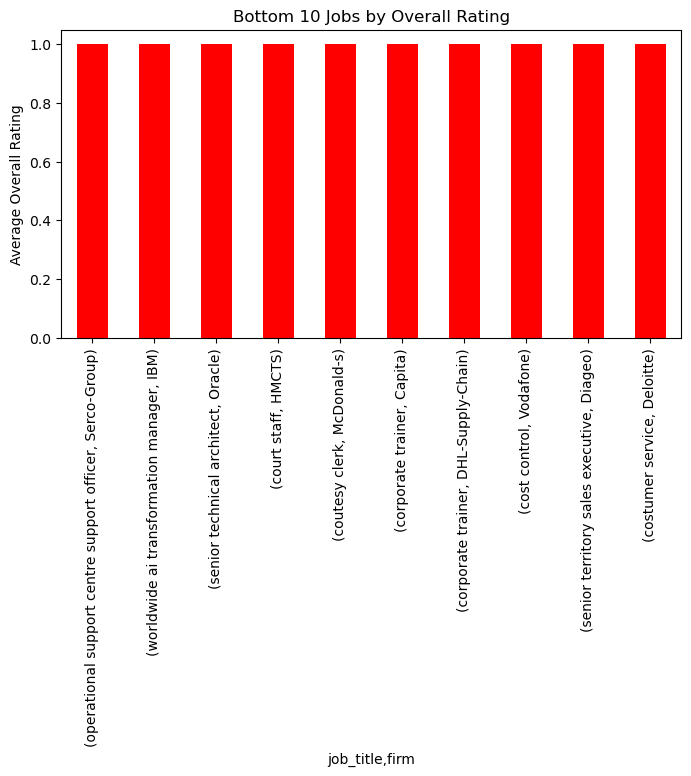

In [27]:
plt.figure(figsize=(8,4))
top_jobs.plot(kind='bar', color='green')
plt.title("Top 10 Jobs by Overall Rating")
plt.ylabel("Average Overall Rating")
plt.savefig('assets/Top 10 jobs.png', transparent = True, bbox_inches='tight')
plt.show();

plt.figure(figsize=(8,4))
bottom_jobs.plot(kind='bar', color='red')
plt.title("Bottom 10 Jobs by Overall Rating")
plt.ylabel("Average Overall Rating")
plt.savefig('assets/Bottom 10 jobs.png', transparent = True, bbox_inches='tight')
plt.show();

The first bar chart illustrates the top 10 jobs, along with their corresponding company names, that have received a perfect rating of 5, and the second bar chart presents the bottom 10 jobs that have received a rating of 1, denoting the lowest level.

<div style="background-color:#eaf4fa; padding:15px; border-left:6px solid #3498db; border-radius:4px;">
  <h3 style="margin-top:0; color:#3498db;">6: How do the top 5 most-reviewed companies compare in each of the sub-ratings?</h3>
</div>

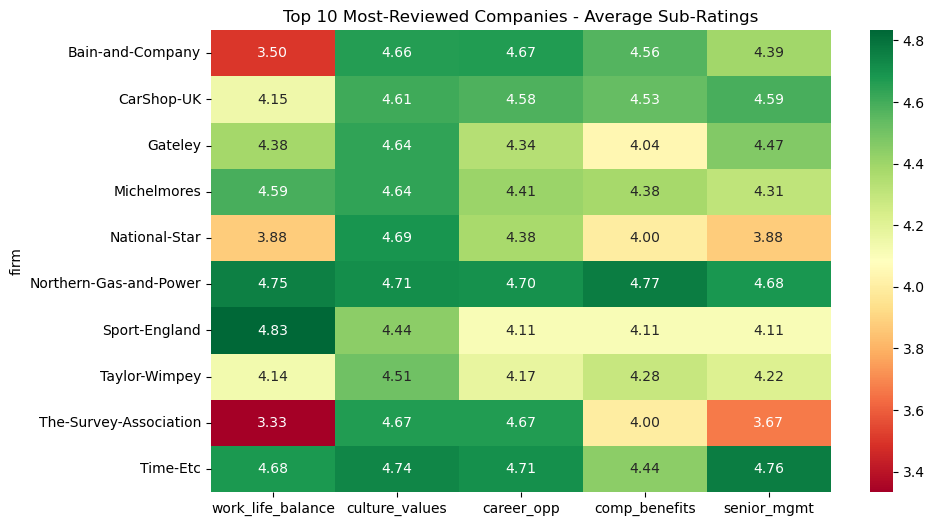

In [28]:
top_companies_index = top_companies.index
top_data = df[df['firm'].isin(top_companies_index)]
top_avg = top_data.groupby('firm')[sub_ratings].mean()

cmap = sns.color_palette("RdYlGn", as_cmap=True)

plt.figure(figsize=(10,6))
sns.heatmap(top_avg, annot=True, cmap=cmap, fmt=".2f")
plt.title('Top 10 Most-Reviewed Companies - Average Sub-Ratings')
plt.savefig('assets/heatmap for top 10 companies.png', transparent = True, bbox_inches='tight')
plt.show();

The heatmap represents the sub-ratings for the top 10 companies. The color gradient ranges from dark red (lowest ratings, approximately 3.4) to dark green (highest ratings, approximately 4.8), with shades of yellow and lighter green indicating mid-range scores. Overall, the heatmap reveals a strong performance in culture and values and career opportunities across most companies. Work-life balance and senior management show more variability and lower scores for some companies.

<div style="background-color:#eaf4fa; padding:15px; border-left:6px solid #3498db; border-radius:4px;">
  <h3 style="margin-top:0; color:#3498db;">7: Which company has the highest positive recommendation percentage?</h3>
</div>

In [29]:
# Code recommend column to positive:2, mild:1, negative:0, no opinion:null
recommend_mapping = {'v': 2, 'r': 1, 'x': 0, 'o': np.nan}
df['recommend_score'] = df['recommend'].map(recommend_mapping)

In [30]:
positive_recommend_perc = df.groupby('firm').apply(lambda x: (x['recommend'] == 'v').mean() * 100).sort_values(ascending=False)
print("\nCompany with highest % of positive recommendations:\n", positive_recommend_perc.head(10))


Company with highest % of positive recommendations:
 firm
NPSA                      100.000000
The-Survey-Association    100.000000
UHMBT                     100.000000
i-Net-Solution            100.000000
Michelmores                95.081967
Time-Etc                   94.117647
Northern-Gas-and-Power     91.932059
CarShop-UK                 91.452991
Taylor-Wimpey              90.963855
Kingsley-Healthcare        90.654206
dtype: float64


/var/folders/r8/vj6vz7415jx39m3lpn719k3h0000gn/T/ipykernel_3455/2986686604.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  positive_recommend_perc = df.groupby('firm').apply(lambda x: (x['recommend'] == 'v').mean() * 100).sort_values(ascending=False)


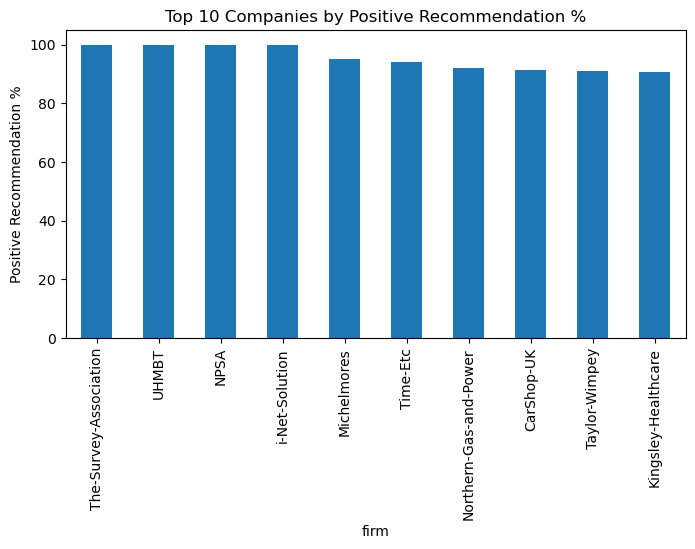

In [31]:
positive_recommend = df[df['recommend'] == 'v'].groupby('firm').size() / df.groupby('firm').size() * 100
positive_recommend = positive_recommend.dropna().sort_values(ascending=False)

plt.figure(figsize=(8,4))
positive_recommend.head(10).plot(kind='bar')
plt.title("Top 10 Companies by Positive Recommendation %")
plt.ylabel("Positive Recommendation %")
plt.savefig('assets/Positive percentage top 10 companies.png', transparent = True, bbox_inches='tight')
plt.show();

The bar chart shows the top 10 companies with the highest positive recommendation percentages. NPSA, The-Survey-Association, UHMBT, and i-Net-Solution had a 100% positive recommendation percentage.

<div style="background-color:#eaf4fa; padding:15px; border-left:6px solid #3498db; border-radius:4px;">
  <h3 style="margin-top:0; color:#3498db;">8: Is there a correlation between overall rating and recommend?</h3>
</div>

In [32]:
correlation = df['overall_rating'].corr(df['recommend_score'])
print(f"\nCorrelation between overall rating and recommend score: {correlation:.2f}")


Correlation between overall rating and recommend score: 0.73


<div style="background-color:#eaf4fa; padding:15px; border-left:6px solid #3498db; border-radius:4px;">
  <h3 style="margin-top:0; color:#3498db;">9: What is the proportion of current and former employees in the dataset?</h3>
</div>

In [33]:
# Extract employement status 
df['employment_status'] = df['current'].str.lower().apply( 
    lambda x: 'Current' if 'current' in x else ('Former' if 'former' in x else 'Other'))

In [34]:
status_counts = df['employment_status'].value_counts(normalize=True) * 100
print("\nProportion of current vs former employees (%):\n", status_counts)


Proportion of current vs former employees (%):
 employment_status
Current    59.621759
Former     40.378241
Name: proportion, dtype: float64


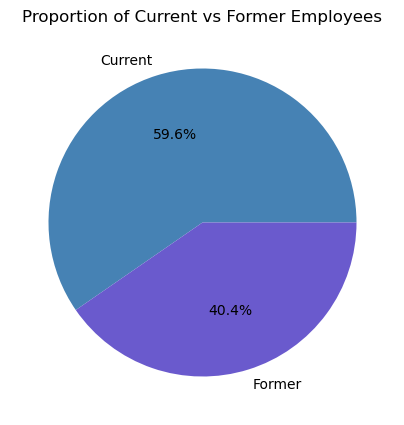

In [35]:
plt.figure(figsize=(5,5))
status_counts[['Current', 'Former']].plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#4682B4','#6A5ACD'],
    labels=['Current', 'Former']
)
plt.ylabel('')
plt.title('Proportion of Current vs Former Employees')
plt.savefig('assets/reviewers distibution.png', transparent = True, bbox_inches='tight')
plt.show();

The pie chart shows the distribution of reviewers. Among the total groups, 59.6% are current employees, while 40.4% are former employees. 

<div style="background-color:#e8f4fd; padding:15px; border-left:6px solid #3498db; border-radius:4px;">
  <h2 style="margin-top:0; color:#2980b9;">Conclusion</h2>
  <hr style="border: 1px solid #3498db; margin-top:5px; margin-bottom:15px;">

A sample of 577,992 reviews from 2008 to 2021 has been analyzed. 59.6% of the reviewers are current employees, whereas 40.4% are former employees. The overall rating has a mean of 3.65. The sub-ratings covers 5 main aspects: work-life balance, culture and values, career opportunities, compensation and benefits, and senior management, and have a mean of 3.4, 3.6, 3.5, 3.4 and 3.2, respectively. 

</div>